# Intrusion Detection System Analysis using Neural Networks
#By- Aarush Kumar
#Dated: July 15,2021

In [1]:
from IPython.display import Image
Image(url='https://i.pinimg.com/originals/6e/be/e3/6ebee362be2bf26a106f2bfc693e4c93.png')

In [2]:
import pandas as pd
import numpy as np

In [3]:
init_train_df = pd.read_csv('/home/aarush100616/Downloads/Projects/Intrusion Detection System Analysis/kdd_train.csv')
init_test_df = pd.read_csv('/home/aarush100616/Downloads/Projects/Intrusion Detection System Analysis/kdd_test.csv')

In [4]:
init_train_df

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                  25   
1                    0       0    0  ...                   1   
2                    0       0    0  ...                  26   
3                    0       0    0  ...                 255   
4                    0       0    0  ...                 255   
...                ...     ...  ...  ...                 ...   
125968               0       0    0  ...                  25   
125969               0       0    0  ...                 244   
125970               0       0    0  ...                  30   
125971               0       0    0  ...                   8   
125972               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.17                    0.03   
1                         0.00                    0.60   
2                         0.10                    0.05   
3                         1.00                    0.00   
4                         1.00                    0.00   
...                        ...                     ...   
125968                    0.10                    0.06   
125969                    0.96                    0.01   
125970                    0.12                    0.06   
125971                    0.03                    0.05   
125972                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.17                         0.00   
1                              0.88                         0.00   
2                              0.00                         0.00   
3                              0.03                         0.04   
4                              0.00                         0.00   
...                             ...                          ...   
125968                         0.00                         0.00   
125969                         0.01                         0.00   
125970                         0.00                         0.00   
125971                         0.00                         0.00   
125972                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
125968                  1.00                      1.00                  0.00   
125969                  0.00                      0.00                  0.00   
125970                  0.72                      0.00                  0.01   


In [5]:
init_test_df

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             5           tcp      smtp    SF       2429        475     0   
1             0           udp  domain_u    SF         45        134     0   
2             0           udp  domain_u    SF         45         80     0   
3          1979           udp     other    SF        145        105     0   
4         14462           tcp     other  RSTR          1          0     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp   private   REJ          0          0     0   
22540         0           tcp      http    SF        254       2277     0   
22541         0           tcp   private    S0          0          0     0   
22542         0           tcp   private  RSTR          0          0     0   
22543         0           udp  domain_u    SF         44        129     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                   0       0    0  ...                  57   
1                   0       0    0  ...                 155   
2                   0       0    0  ...                 255   
3                   0       0    0  ...                   2   
4                   0       0    0  ...                   2   
...               ...     ...  ...  ...                 ...   
22539               0       0    0  ...                   1   
22540               0       0    0  ...                 255   
22541               0       0    0  ...                  25   
22542               0       0    0  ...                   1   
22543               0       0    0  ...                 255   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                        0.11                    0.02   
1                        0.80                    0.02   
2                        1.00                    0.00   
3                        0.01                    0.84   
4                        0.01                    0.68   
...                       ...                     ...   
22539                    0.00                    1.00   
22540                    1.00                    0.00   
22541                    0.10                    0.07   
22542                    0.00                    0.58   
22543                    1.00                    0.00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             0.01                         0.04   
1                             0.01                         0.00   
2                             0.01                         0.00   
3                             1.00                         0.00   
4                             1.00                         0.00   
...                            ...                          ...   
22539                         0.00                         0.00   
22540                         0.04                         0.04   
22541                         0.00                         0.00   
22542                         0.57                         0.00   
22543                         0.00                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                       0.0                  0.87   
1                      0.00                       0.0                  0.00   
2                      0.00                       0.0                  0.00   
3                      0.00                       0.0                  0.00   
4                      0.00                       0.0                  1.00   
...                     ...                       ...                   ...   
22539                  0.09                       0.0                  0.91   
22540                  0.00                       0.0                  0.00   
22541                  1.00                       1.0                  0.00   
22542                  0.00                  

## Exploratory Data Analysis(EDA)

In [6]:
init_train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
init_train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Types of Features and Scope

In [8]:
init_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
init_train_df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [10]:
init_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [11]:
init_test_df.nunique()

duration                        704
protocol_type                     3
service                          66
flag                             11
src_bytes                      1517
dst_bytes                      3745
land                              2
wrong_fragment                    3
urgent                            3
hot                              18
num_failed_logins                 6
logged_in                         2
num_compromised                  29
root_shell                        2
su_attempted                      3
num_root                         27
num_file_creations               14
num_shells                        3
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           476
srv_count                       428
serror_rate                      85
srv_serror_rate                  66
rerror_rate                      85
srv_rerror_rate             

## Visualizations

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

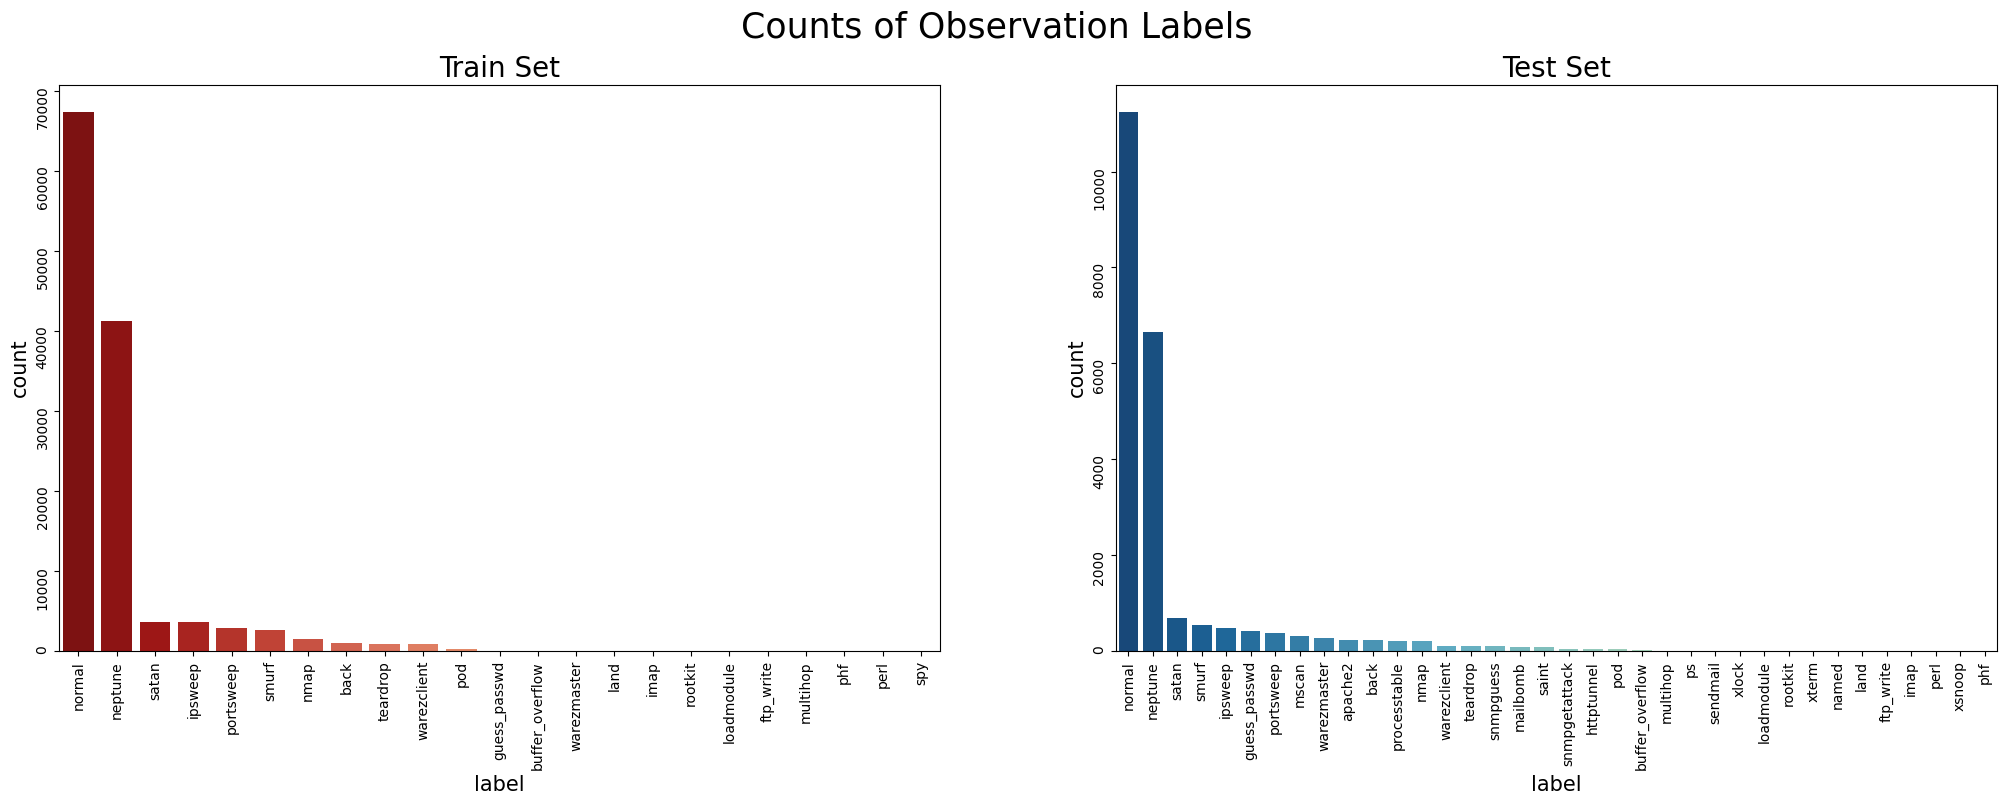

In [13]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)
fig.suptitle(f'Counts of Observation Labels', fontsize=25)
sns.countplot(x="labels", 
            palette="OrRd_r", 
            data=init_train_df, 
            order=init_train_df['labels'].value_counts().index,
            ax=ax1)
ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)
sns.countplot(x="labels", 
            palette="GnBu_r", 
            data=init_test_df, 
            order=init_test_df['labels'].value_counts().index,
            ax=ax2)
ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)
plt.show()

In [14]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 
        ax.hist(df[col], bins=20) 
        #ax.set_ylabel('Count', fontsize=12)
        ax.set_title(f'{col} distribution', fontsize=15) 
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

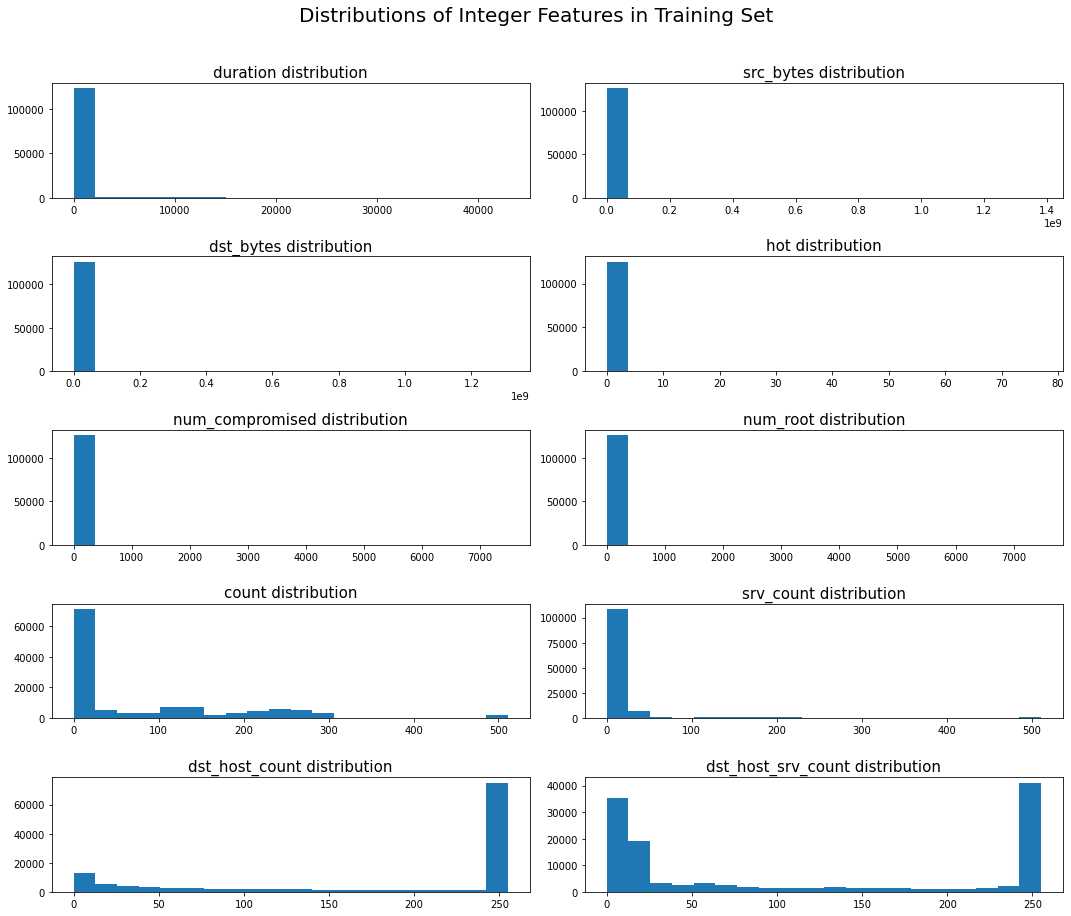

In [15]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
plot_hist(init_train_df, hist_cols, 'Distributions of Integer Features in Training Set')

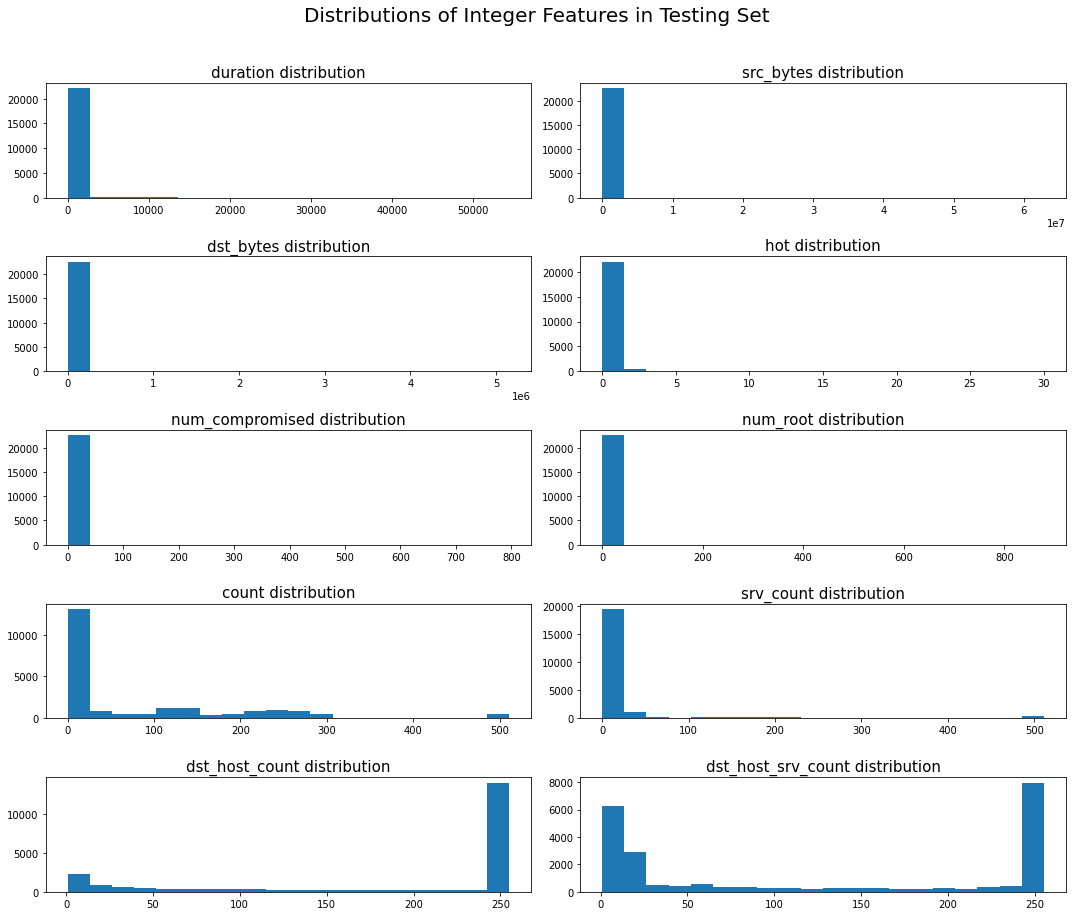

In [16]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
plot_hist(init_test_df, hist_cols, 'Distributions of Integer Features in Testing Set')

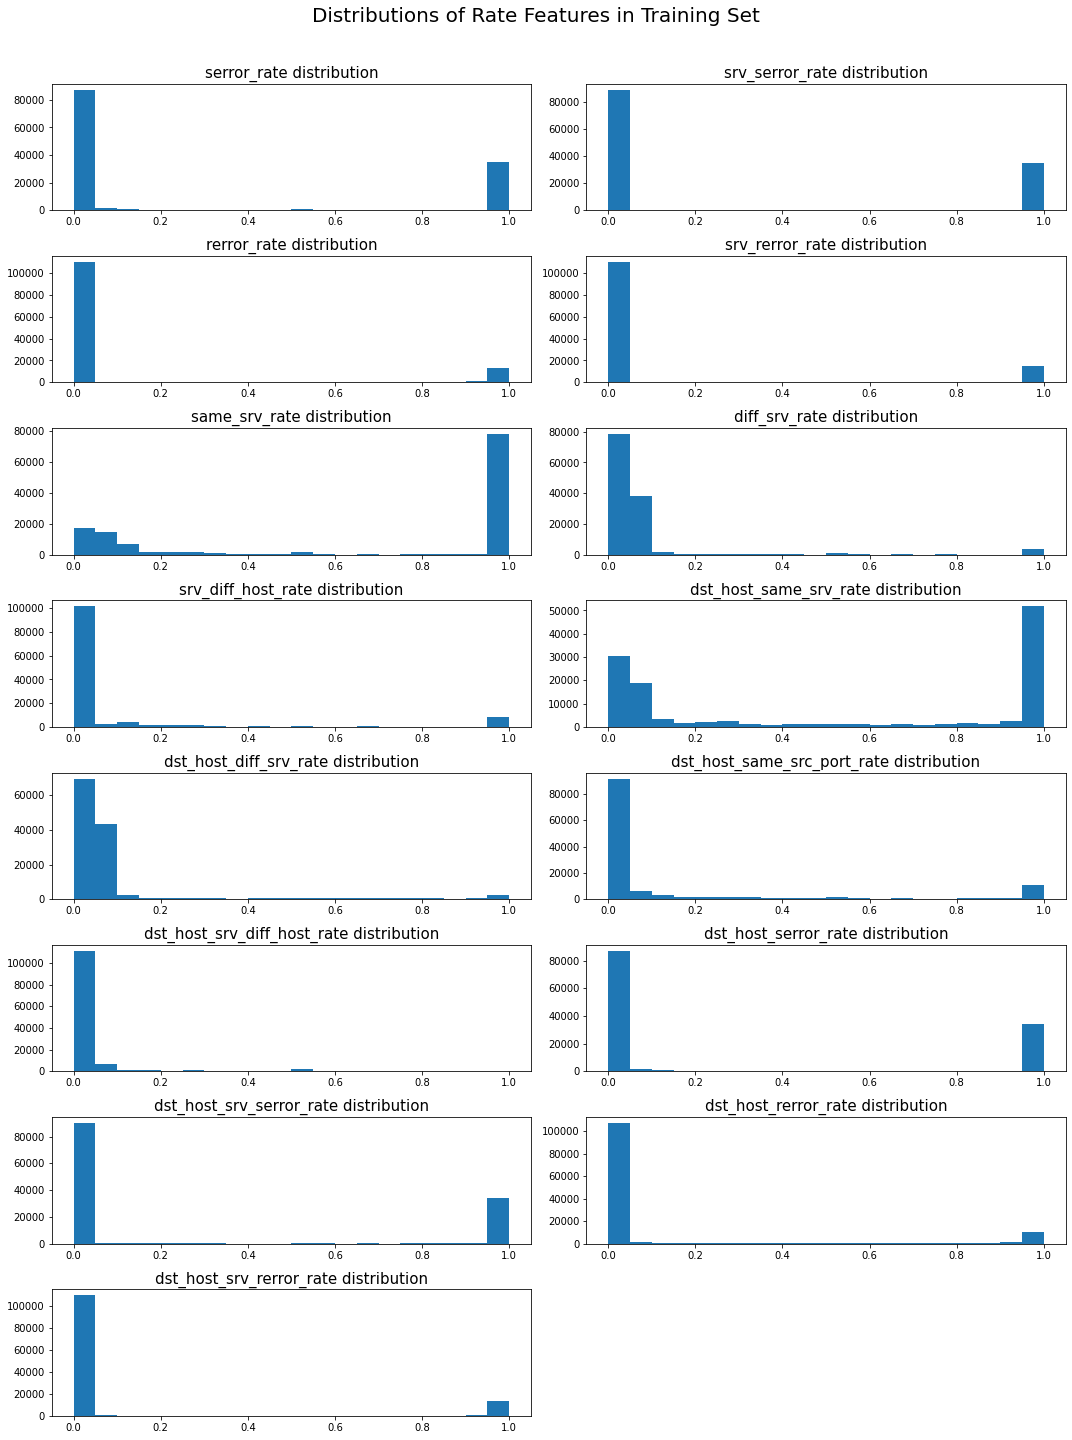

In [17]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
plot_hist(init_train_df, rate_cols, 'Distributions of Rate Features in Training Set')

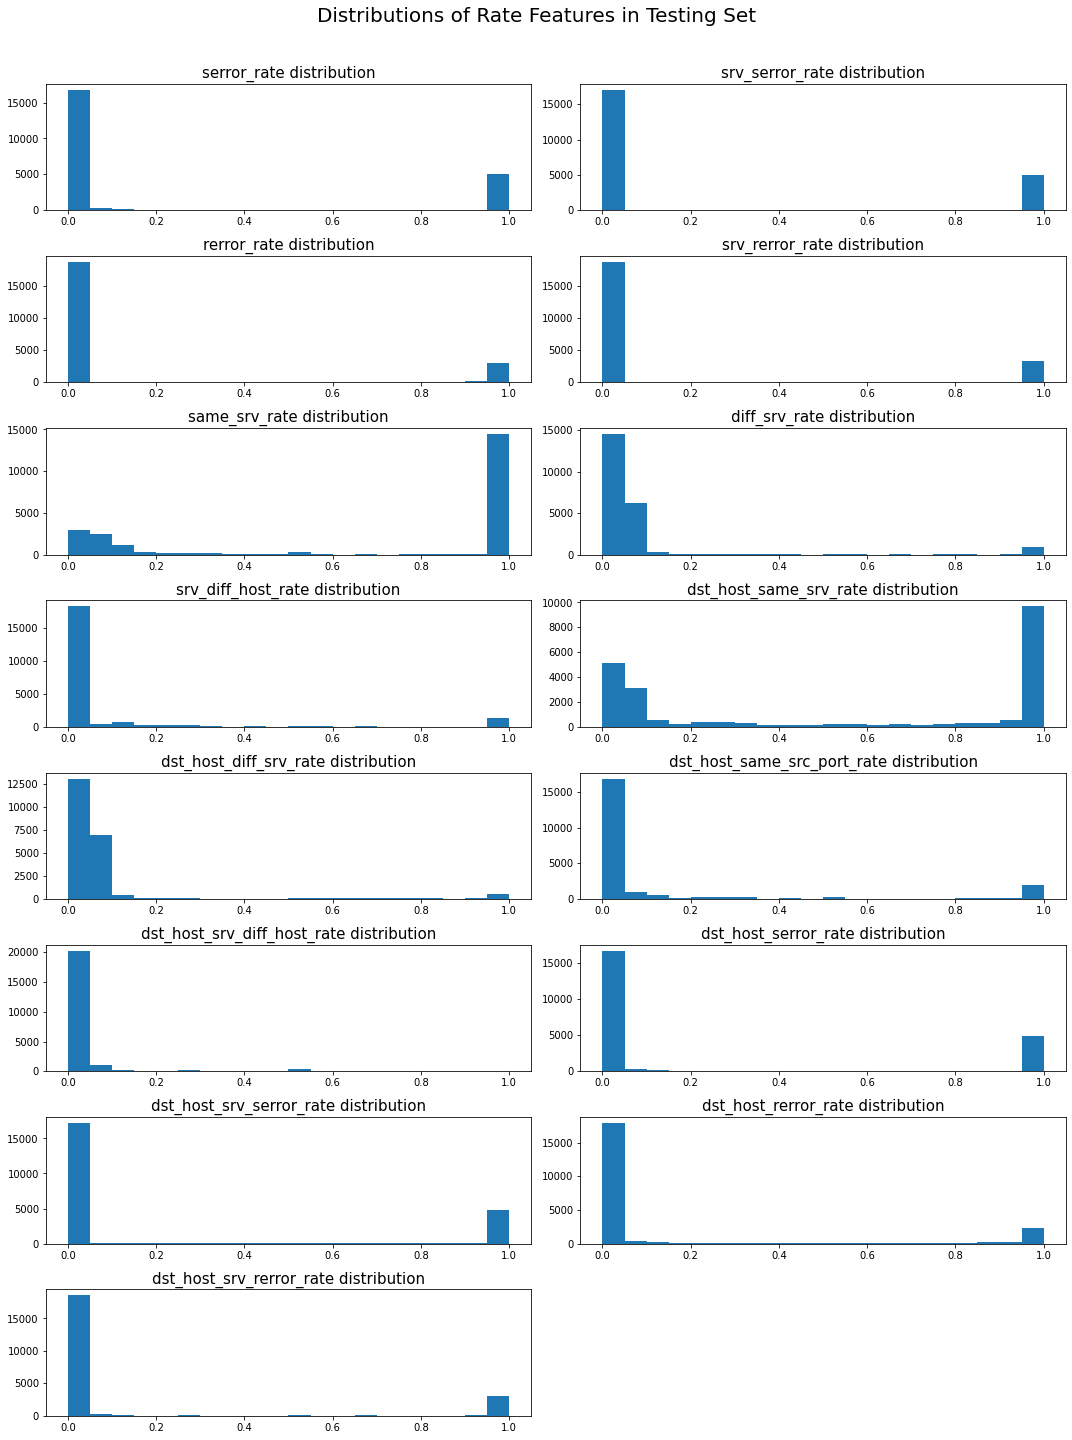

In [18]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
plot_hist(init_test_df, rate_cols, 'Distributions of Rate Features in Testing Set')

## Data Preprocessing

In [19]:
random_state = 42
proc_train_df = init_train_df.copy()                                                                      # create a copy of our initial train set to use as our preproccessed train set.
proc_test_df = init_test_df.copy()                                                                        # create a copy of our initial test set to use as our preproccessed test set.
proc_train_normal_slice = proc_train_df[proc_train_df['labels']=='normal'].copy()                         # get the slice of our train set with all normal observations
proc_train_neptune_slice = proc_train_df[proc_train_df['labels']=='neptune'].copy()                       # get the slice of our train set with all neptune observations
proc_test_normal_slice = proc_test_df[proc_test_df['labels']=='normal'].copy()                            # get the slice of our test set with all normal observations
proc_test_neptune_slice = proc_test_df[proc_test_df['labels']=='neptune'].copy()                          # get the slice of our test set with all neptune observations
proc_train_normal_sampled = proc_train_normal_slice.sample(n=5000, random_state=random_state)             # downsample train set normal slice to 5000 oberservations
proc_train_neptune_sampled = proc_train_neptune_slice.sample(n=5000, random_state=random_state)           # downsample train set neptune slice to 5000 oberservations
proc_test_normal_sampled = proc_test_normal_slice.sample(n=1000, random_state=random_state)               # downsample test set normal slice to 1000 oberservations
proc_test_neptune_sampled = proc_test_neptune_slice.sample(n=1000, random_state=random_state)             # downsample test set neptune slice to 5000 oberservations
proc_train_df.drop(proc_train_df.loc[proc_train_df['labels']=='normal'].index, inplace=True)              # drop initial train normal slice
proc_train_df.drop(proc_train_df.loc[proc_train_df['labels']=='neptune'].index, inplace=True)             # drop initial train neptune slice
proc_test_df.drop(proc_test_df.loc[proc_test_df['labels']=='normal'].index, inplace=True)                 # drop initial test normal slice
proc_test_df.drop(proc_test_df.loc[proc_test_df['labels']=='neptune'].index, inplace=True)                # drop initial test neptune slice
proc_train_df = pd.concat([proc_train_df, proc_train_normal_sampled, proc_train_neptune_sampled], axis=0) # add sampled train normal and neptune slices back to train set
proc_test_df = pd.concat([proc_test_df, proc_test_normal_sampled, proc_test_neptune_sampled], axis=0)     # add sampled test normal and neptune slices back to test set

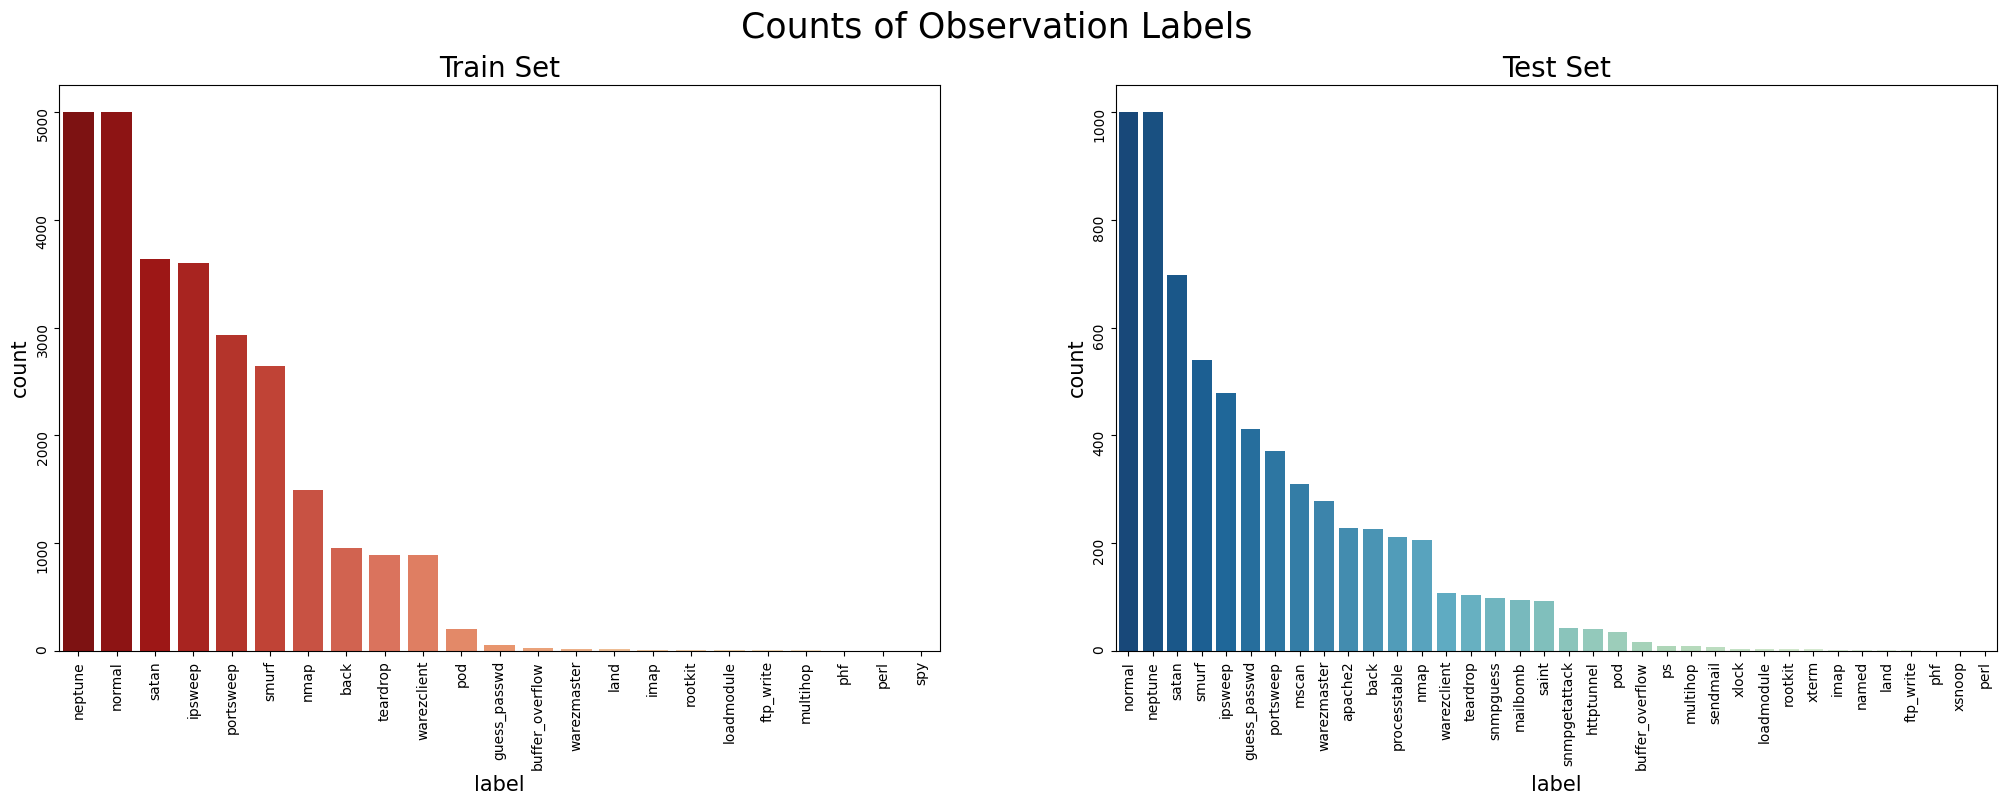

In [20]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)
fig.suptitle(f'Counts of Observation Labels', fontsize=25)
sns.countplot(x="labels", 
            palette="OrRd_r", 
            data=proc_train_df, 
            order=proc_train_df['labels'].value_counts().index,
            ax=ax1)
ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)
sns.countplot(x="labels", 
            palette="GnBu_r", 
            data=proc_test_df, 
            order=proc_test_df['labels'].value_counts().index,
            ax=ax2)
ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)
plt.show()

In [21]:
keep_labels = ['normal', 'neptune', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop', 'warezclient']
proc_train_df['labels'] = proc_train_df['labels'].apply(lambda x: x if x in keep_labels else 'other')
proc_test_df['labels'] = proc_test_df['labels'].apply(lambda x: x if x in keep_labels else 'other')

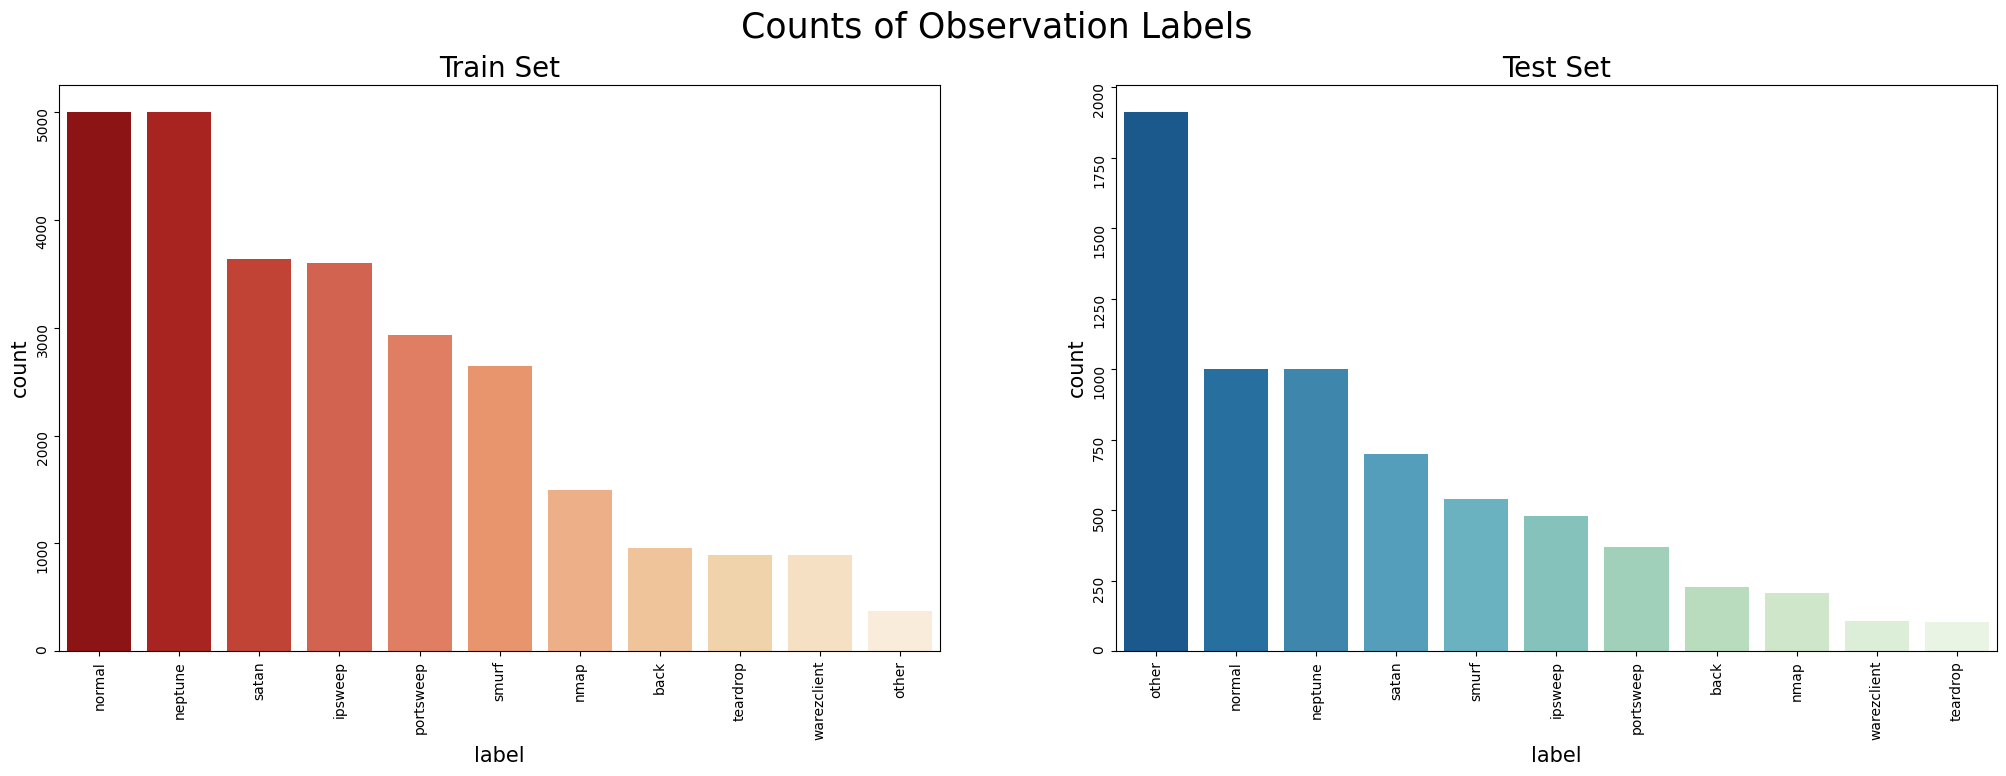

In [22]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)
fig.suptitle(f'Counts of Observation Labels', fontsize=25)
sns.countplot(x="labels", 
            palette="OrRd_r", 
            data=proc_train_df, 
            order=proc_train_df['labels'].value_counts().index,
            ax=ax1)
ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)
sns.countplot(x="labels", 
            palette="GnBu_r", 
            data=proc_test_df, 
            order=proc_test_df['labels'].value_counts().index,
            ax=ax2)
ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
seed_random = 718
proc_test_other_slice = proc_test_df[proc_test_df['labels']=='other'].copy()
proc_train_other_sampled, proc_test_other_sampled = train_test_split(proc_test_other_slice, test_size=0.2, random_state=seed_random)
proc_test_df.drop(proc_test_df.loc[proc_test_df['labels']=='other'].index, inplace=True)
proc_train_df = pd.concat([proc_train_df, proc_train_other_sampled], axis=0)
proc_test_df = pd.concat([proc_test_df, proc_test_other_sampled], axis=0)

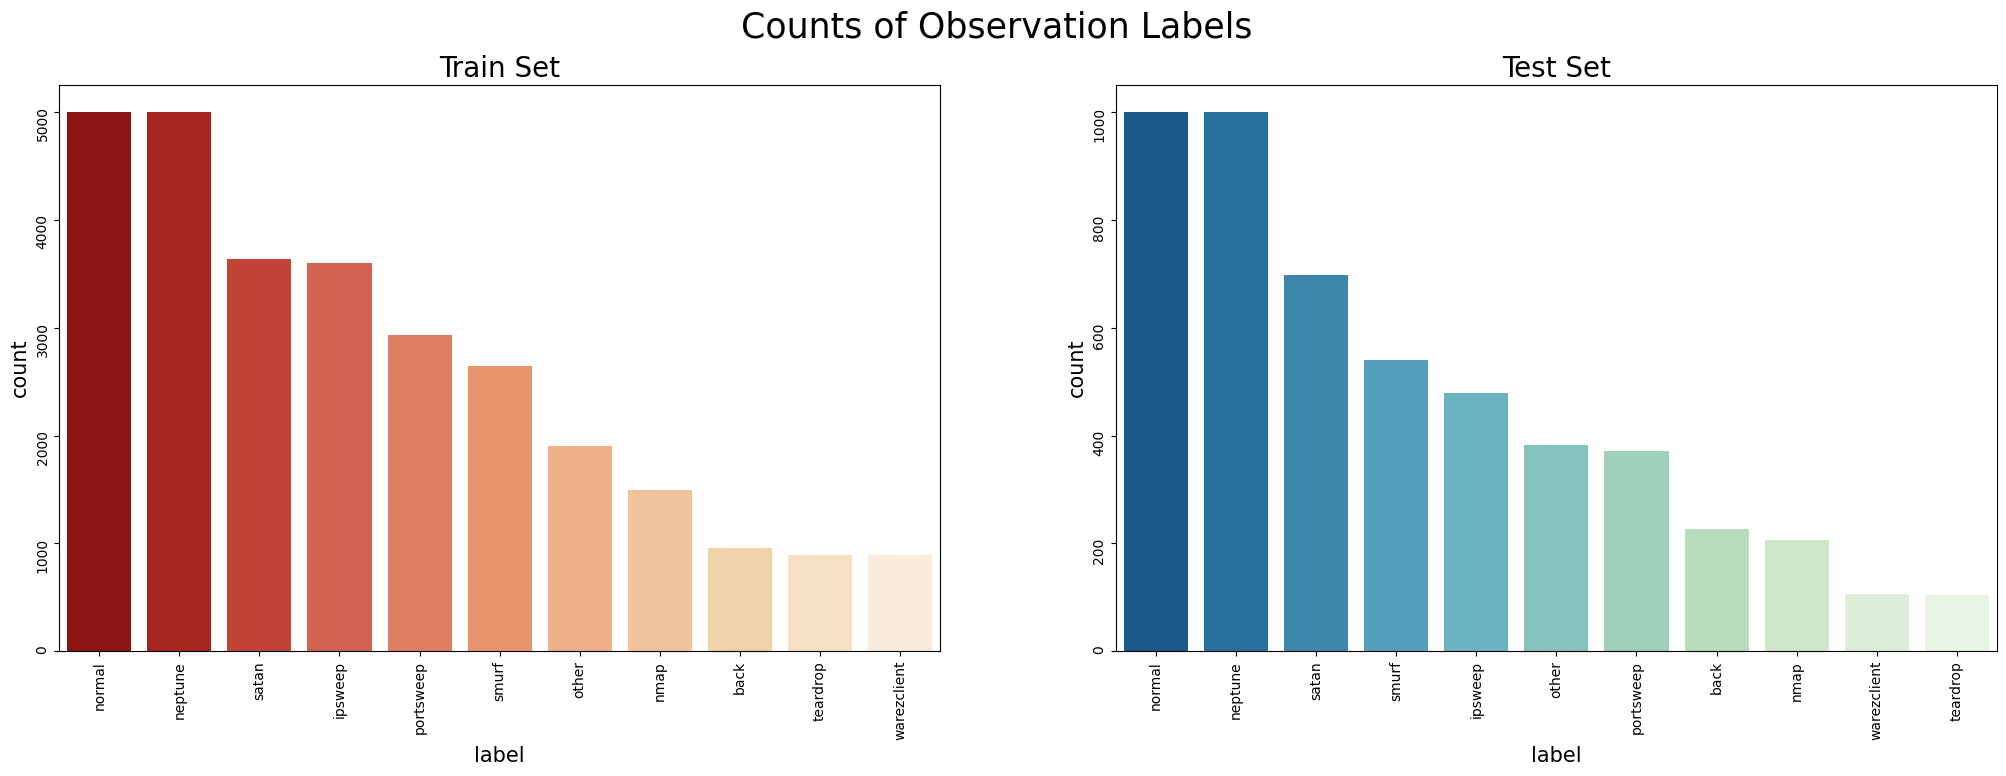

In [24]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)
fig.suptitle(f'Counts of Observation Labels', fontsize=25)
sns.countplot(x="labels", 
            palette="OrRd_r", 
            data=proc_train_df, 
            order=proc_train_df['labels'].value_counts().index,
            ax=ax1)
ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)
sns.countplot(x="labels", 
            palette="GnBu_r", 
            data=proc_test_df, 
            order=proc_test_df['labels'].value_counts().index,
            ax=ax2)
ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)
plt.show()

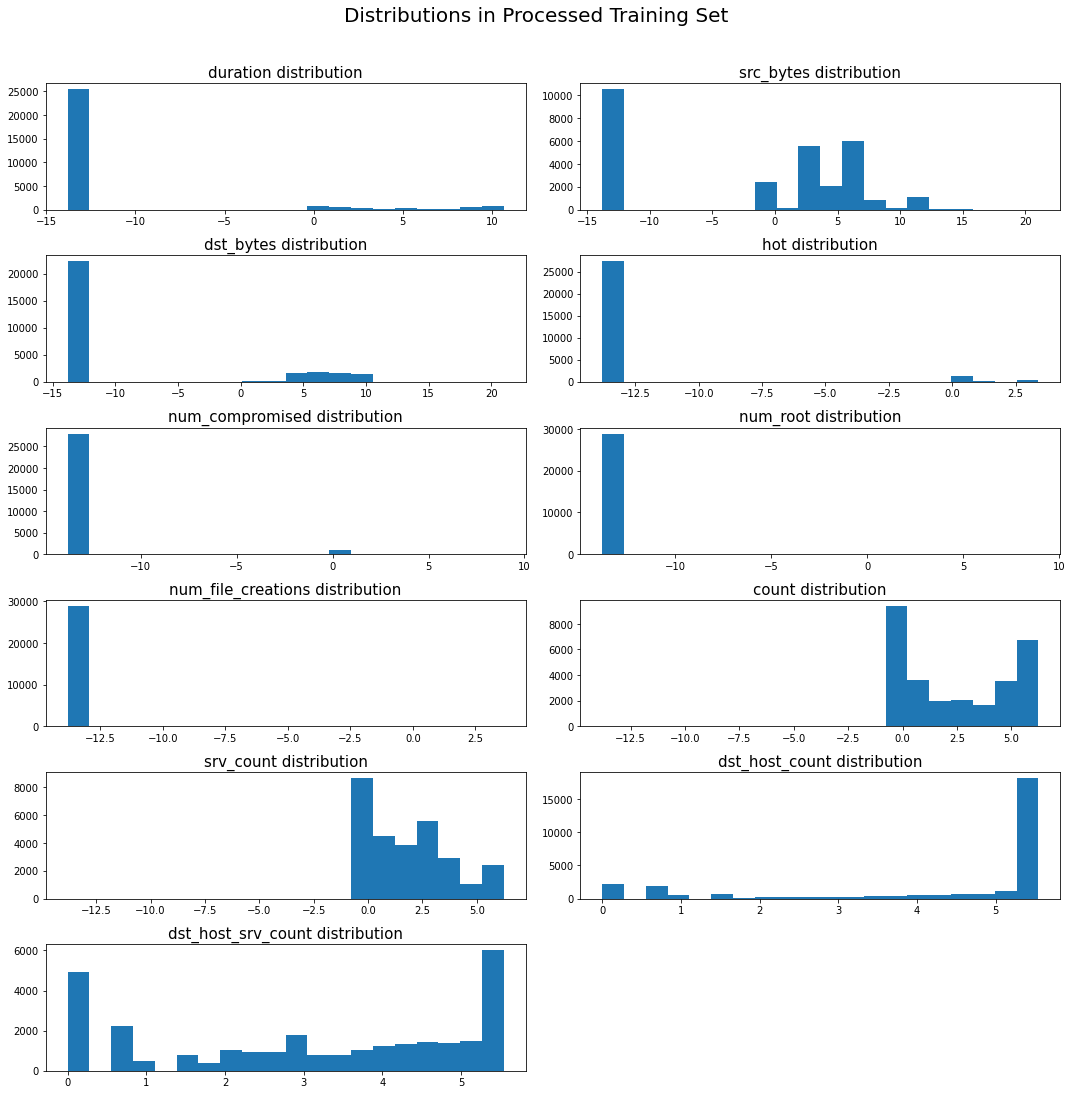

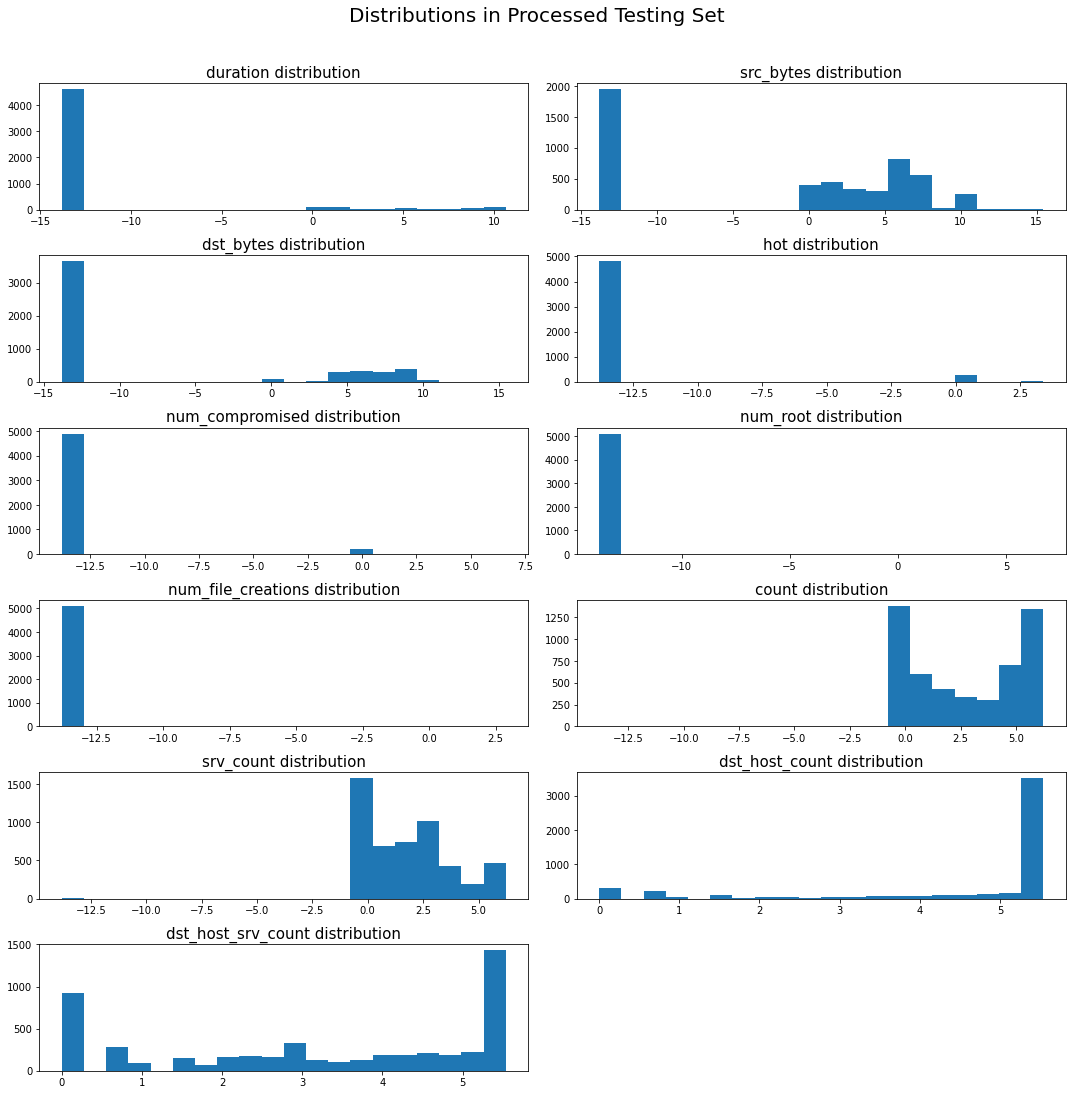

In [25]:
norm_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
for col in norm_cols:
    proc_train_df[col] = np.log(proc_train_df[col]+1e-6)
    proc_test_df[col] = np.log(proc_test_df[col]+1e-6)
plot_hist(proc_train_df, norm_cols, 'Distributions in Processed Training Set')
plot_hist(proc_test_df, norm_cols, 'Distributions in Processed Testing Set')

In [26]:
proc_train_df['train']=1                                                                       # add train feature with value 1 to our training set
proc_test_df['train']=0                                                                        # add train feature with value 0 to our testing set
joined_df = pd.concat([proc_train_df, proc_test_df])                                           # join the two sets
protocol_dummies = pd.get_dummies(joined_df['protocol_type'], prefix='protocol_type')          # get one-hot encoded features for protocol_type feature
service_dummies = pd.get_dummies(joined_df['service'], prefix='service')                       # get one-hot encoded features for service feature
flag_dummies = pd.get_dummies(joined_df['flag'], prefix='flag')                                # get one-hot encoded features for flag feature
joined_df = pd.concat([joined_df, protocol_dummies, service_dummies, flag_dummies], axis=1)    # join one-hot encoded features to joined dataframe
proc_train_df = joined_df[joined_df['train']==1]                                               # split train set from joined, using the train feature
proc_test_df = joined_df[joined_df['train']==0]                                                # split test set from joined, using the train feature
drop_cols = ['train', 'protocol_type', 'service', 'flag']                                      # columns to drop
proc_train_df.drop(drop_cols, axis=1, inplace=True)                                            # drop original columns from training set
proc_test_df.drop(drop_cols, axis=1, inplace=True)                                             # drop original columns from testing set

/home/aarush100616/.local/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
proc_train_df

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  \
13    -1.381551e+01   5.811141 -13.815511     0               0       0   
17    -1.381551e+01   2.890372 -13.815511     0               0       0   
30    -1.381551e+01   2.079442 -13.815511     0               0       0   
33    -1.381551e+01 -13.815511 -13.815511     0               0       0   
46    -1.381551e+01   3.332205 -13.815511     0               3       0   
...             ...        ...        ...   ...             ...     ...   
10842 -1.381551e+01 -13.815511 -13.815511     0               0       0   
13700 -1.381551e+01 -13.815511   3.583519     0               0       0   
15780 -1.381551e+01 -13.815511   3.784190     0               0       0   
10611  5.638355e+00   5.087596   6.395262     0               0       0   
677    9.999995e-07 -13.815511   3.583519     0               0       0   

             hot  num_failed_logins  logged_in  num_compromised  ...  \
13    -13.815511                  0          1       -13.815511  ...   
17    -13.815511                  0          0       -13.815511  ...   
30    -13.815511                  0          0       -13.815511  ...   
33    -13.815511                  0          0       -13.815511  ...   
46    -13.815511                  0          0       -13.815511  ...   
...          ...                ...        ...              ...  ...   
10842 -13.815511                  0          0       -13.815511  ...   
13700 -13.815511                  0          1       -13.815511  ...   
15780 -13.815511                  0          0       -13.815511  ...   
10611   0.693148                  0          1       -13.815511  ...   
677   -13.815511                  0          1       -13.815511  ...   

       flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  \
13            0          0            0          0        0        0        0   
17            0          0            0          0        0        0        0   
30            0          0            0          0        0        0        0   
33            1          0            0          0        0        0        0   
46            0          0            0          0        0        0        0   
...         ...        ...          ...        ...      ...      ...      ...   
10842         1          0            0          0        0        0        0   
13700         0          1            0          0        0        0        0   
15780         0          1            0          0        0        0        0   
10611         0          0            0          0        0        0        0   
677           0          1            0          0        0        0        0   

       flag_S3  flag_SF  flag_SH  
13           0        1        0  
17           0        1        0  
30           0        1        0  
33           0        0        0  
46           0        1        0  
...        ...      ...      ...  
10842        0        0        0  
13700        0        0        0  
15780        0        0        0  
10611        0        1        0  
677          0        0        0  

[28946 rows x 122 columns]

In [28]:
proc_test_df

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  \
4       9.579280  9.999995e-07 -13.815511     0               0       0   
8     -13.815511  6.939254e+00 -13.815511     0               0       0   
9     -13.815511  9.999995e-07 -13.815511     0               0       0   
11    -13.815511 -1.381551e+01 -13.815511     0               0       0   
41    -13.815511  3.332205e+00 -13.815511     0               3       0   
...          ...           ...        ...   ...             ...     ...   
5730  -13.815511  2.995732e+00 -13.815511     0               0       0   
10634 -13.815511  4.653960e+00   4.983607     0               0       0   
7811  -13.815511 -1.381551e+01 -13.815511     0               0       0   
7655    9.011402 -1.381551e+01   2.708050     0               0       0   
8897    1.791760  3.401197e+00   4.532600     0               0       0   

             hot  num_failed_logins  logged_in  num_compromised  ...  \
4     -13.815511                  0          0       -13.815511  ...   
8     -13.815511                  0          0       -13.815511  ...   
9     -13.815511                  0          0       -13.815511  ...   
11    -13.815511                  0          0       -13.815511  ...   
41    -13.815511                  0          0       -13.815511  ...   
...          ...                ...        ...              ...  ...   
5730  -13.815511                  0          0       -13.815511  ...   
10634 -13.815511                  0          0       -13.815511  ...   
7811  -13.815511                  0          0       -13.815511  ...   
7655  -13.815511                  0          0       -13.815511  ...   
8897  -13.815511                  0          1       -13.815511  ...   

       flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  \
4             0          0            0          1        0        0        0   
8             0          0            0          0        0        0        0   
9             0          0            0          0        0        0        0   
11            0          0            0          1        0        0        0   
41            0          0            0          0        0        0        0   
...         ...        ...          ...        ...      ...      ...      ...   
5730          0          0            0          0        0        0        0   
10634         0          0            0          0        0        0        0   
7811          0          0            0          0        1        0        0   
7655          0          0            0          0        0        0        0   
8897          0          0            0          0        0        0        0   

       flag_S3  flag_SF  flag_SH  
4            0        0        0  
8            0        1        0  
9            0        1        0  
11           0        0        0  
41           0        1        0  
...        ...      ...      ...  
5730         0        1        0  
10634        0        1        0  
7811         0        0        0  
7655         0        1        0  
8897         0        1        0  

[5115 rows x 122 columns]

## Model Building

In [29]:
y_buffer = proc_train_df['labels'].copy()
x_buffer = proc_train_df.drop(['labels'], axis=1)
y_test = proc_test_df['labels'].copy()
x_test = proc_test_df.drop(['labels'], axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
seed_random = 315
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_buffer)
x_train, x_val, y_train, y_val = train_test_split(x_buffer, y_buffer, test_size=0.3, random_state=seed_random)

In [31]:
from keras.models import Sequential
from keras.optimizers import Adam, Nadam
from keras.layers import Dense, Dropout
input_size = len(x_train.columns)
deep_model = Sequential()
deep_model.add(Dense(256, input_dim=input_size, activation='softplus'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(64, activation='relu'))
deep_model.add(Dense(32, activation='relu'))
#deep_model.add(Dense(18, activation='softplus'))
deep_model.add(Dense(11, activation='softmax'))
deep_model.compile(loss='categorical_crossentropy', 
                   optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True),
                   metrics=['accuracy'])

In [32]:
y_train_econded = label_encoder.transform(y_train)
y_val_econded = label_encoder.transform(y_val)
y_test_econded = label_encoder.transform(y_test)
y_train_dummy = np_utils.to_categorical(y_train_econded)
y_val_dummy = np_utils.to_categorical(y_val_econded)
y_test_dummy = np_utils.to_categorical(y_test_econded)

In [33]:
deep_model.fit(x_train, y_train_dummy, 
               epochs=50, 
               batch_size=2500,
               validation_data=(x_val, y_val_dummy))

Epoch 1/50
9/9 [==============================] - 15s 101ms/step - loss: 2.5860 - accuracy: 0.2078 - val_loss: 1.7575 - val_accuracy: 0.5423
Epoch 2/50
9/9 [==============================] - 0s 25ms/step - loss: 1.6474 - accuracy: 0.5717 - val_loss: 1.3491 - val_accuracy: 0.6194
Epoch 3/50
9/9 [==============================] - 0s 25ms/step - loss: 1.2482 - accuracy: 0.6527 - val_loss: 1.0411 - val_accuracy: 0.7219
Epoch 4/50
9/9 [==============================] - 0s 24ms/step - loss: 0.9710 - accuracy: 0.7665 - val_loss: 0.8072 - val_accuracy: 0.8093
Epoch 5/50
9/9 [==============================] - 0s 24ms/step - loss: 0.7436 - accuracy: 0.8161 - val_loss: 0.6266 - val_accuracy: 0.8263
Epoch 6/50
9/9 [==============================] - 0s 25ms/step - loss: 0.5877 - accuracy: 0.8354 - val_loss: 0.5199 - val_accuracy: 0.8383
Epoch 7/50
9/9 [==============================] - 0s 24ms/step - loss: 0.4883 - accuracy: 0.8450 - val_loss: 0.4451 - val_accuracy: 0.8456
Epoch 8/50
9/9 [=========

In [34]:
deep_val_pred = deep_model.predict_classes(x_val)
deep_val_pred_decoded = label_encoder.inverse_transform(deep_val_pred)
deep_test_pred = deep_model.predict_classes(x_test)
deep_test_pred_decoded = label_encoder.inverse_transform(deep_test_pred)

/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer 
# Showing Confusion Matrix
# Thanks to https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud
def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

0.9766182776570076

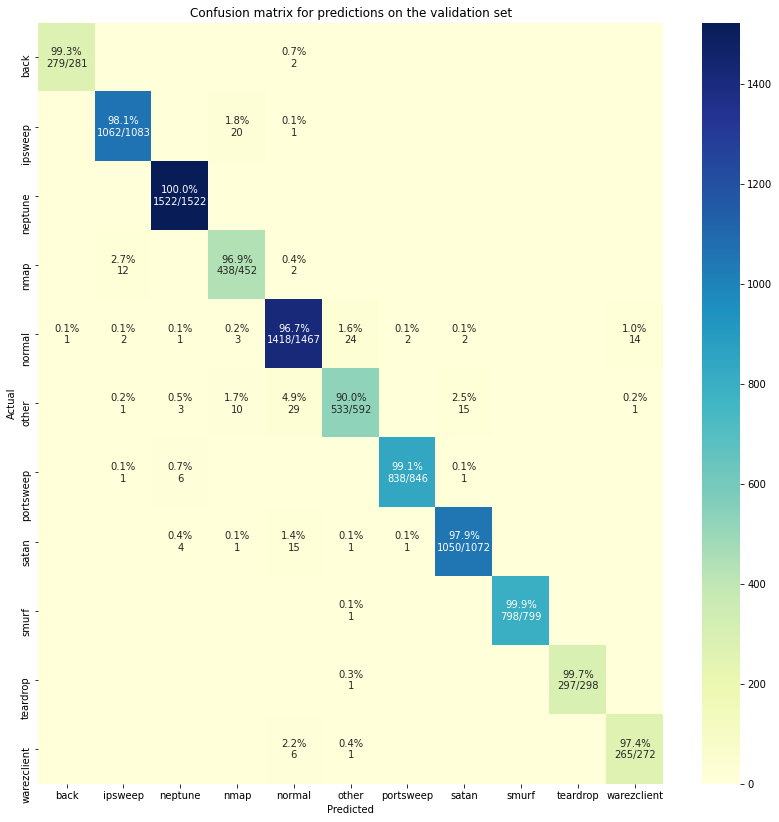

In [36]:
plot_cm(y_val, deep_val_pred_decoded, 'Confusion matrix for predictions on the validation set')
f1_score(y_val, deep_val_pred_decoded, average = 'macro')

0.9738379772137516

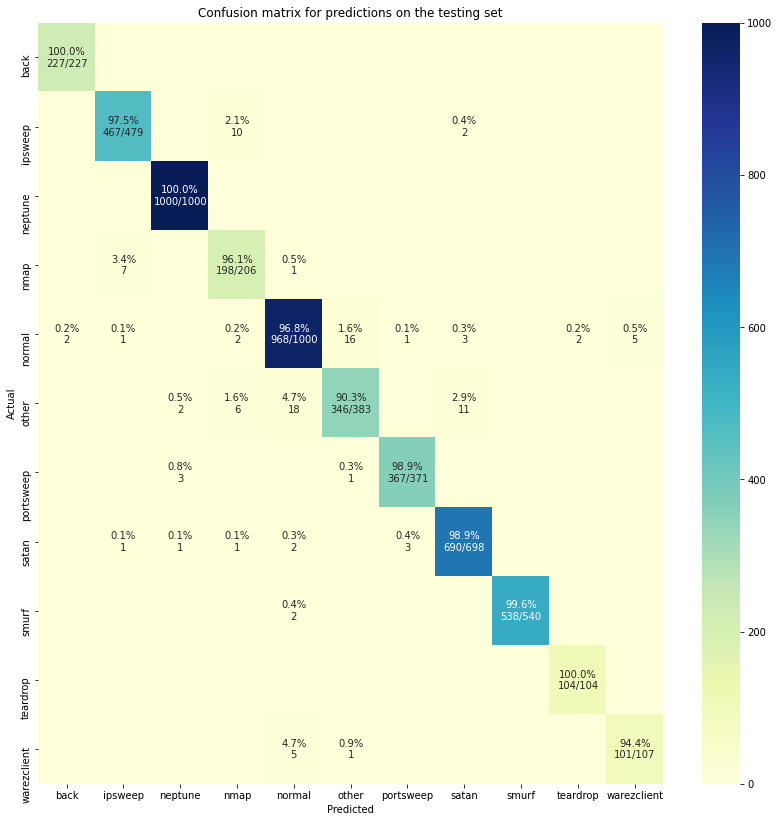

In [37]:
plot_cm(y_test, deep_test_pred_decoded, 'Confusion matrix for predictions on the testing set')
f1_score(y_test, deep_test_pred_decoded, average = 'macro')

### Conclusion:
Wow! We achieved really impressive results with our model predictions on the validation and testing sets! We got F1 Scores of 95.873% and 95.330% respectively!
For all types of attacks, except for nmap and other attacks, we got >95% accuracies. For other attacks, this is not suprising; That label is a conglomerate of various attacks, some with significantly few observations to adequately train on. If we wish to acheive better results with this label, or even predicting the specific attack, we just need to capture and add more such observations to our training set.
For the nmap attack, it is probably due to the fact that it has similar enough metrics to other attacks in the dataset, specifically ipsweep. This is understandable as both nmap and ipsweep activities, aim to figure out how many live IP's there are.